# Implementation of keypoint matching model
Here we will implement a model class for keypoint-matching and test it on the full dataset.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import keypoint_matching as kpm
import kpm_model as model
import cv2
import os

SIFT = cv2.xfeatures2d.SURF_create()
SIFTMatcher = model.KeypointMatcher(SIFT, cv2.NORM_L2SQR)

In [2]:
#test_logo = "Kia"
test_logo = "Adidas-text"

# Read template image - the KIA logo
kia_logo_filename = os.path.join("data", "logos", test_logo.lower() + '.jpg')
kia_logo_image = cv2.imread(kia_logo_filename)
SIFTMatcher.add_template(test_logo, kia_logo_image)

In [3]:
import load_data as ld
metadata = ld.read_metadata()
metadata = ld.filter_by_boundingbox(metadata, 10, 800)
#car_metadata = metadata[metadata.category == 'car']
car_metadata = metadata[(metadata.brand == test_logo) & (metadata.ok == True)]


0.0 0


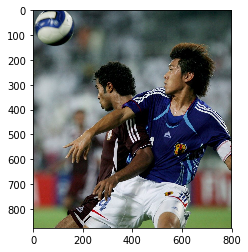

0.0 0


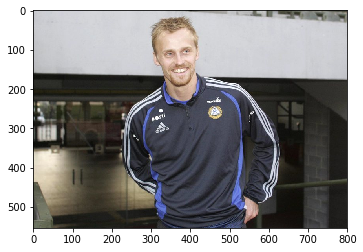

0.0 0


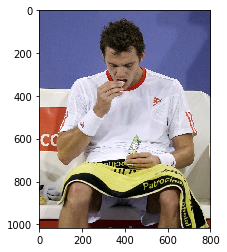

0.0 0


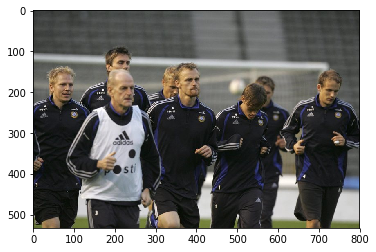

0.0 0


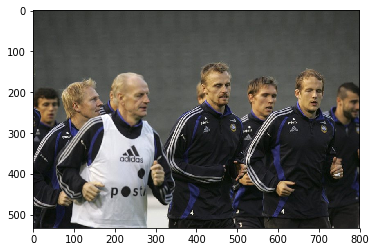

0.0 0


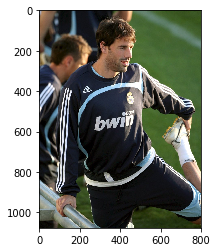

0.0 0


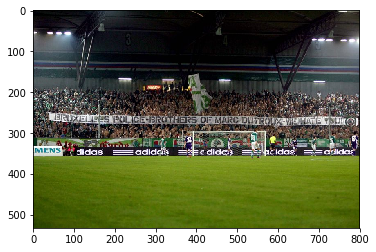

0.0 0


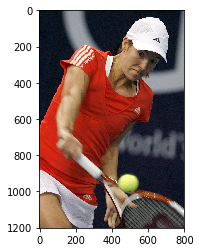

0.0 0


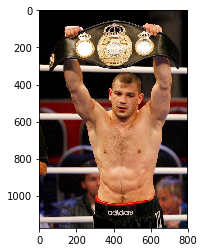

0.0 0


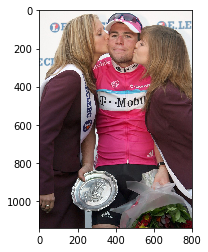

0.0 0


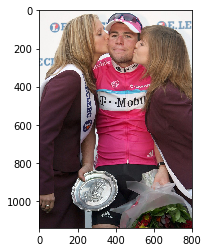

0.0 0


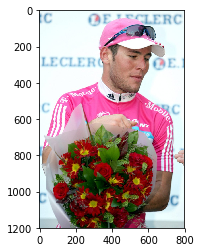

0.0 0


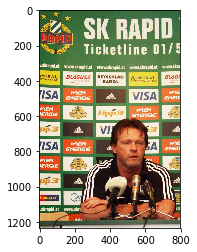

0.0 0


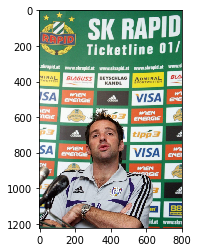

0.0 0


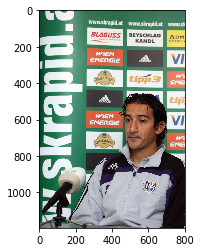

0.0 0


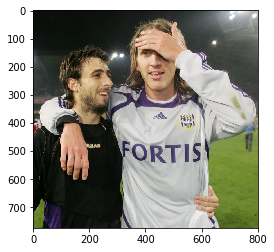

0.0 0


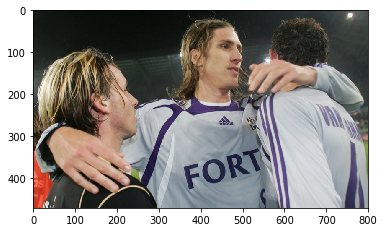

0.0 0


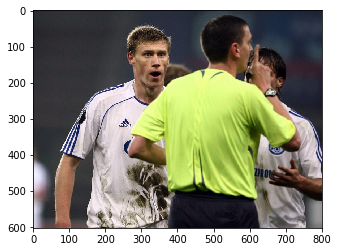

0.0 0


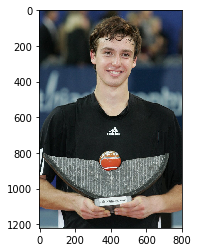

0.0 0


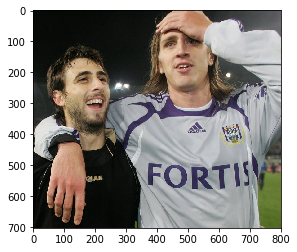

0.0 0


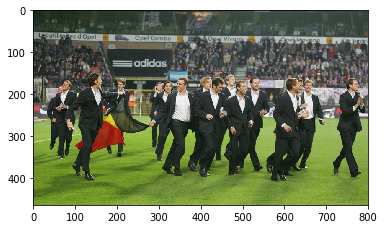

0.0 0


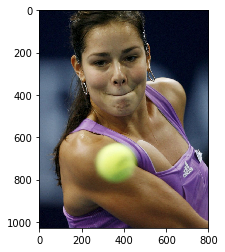

0.0 0


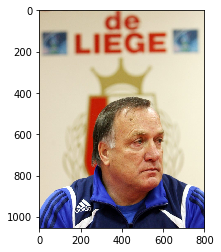

0.0 0


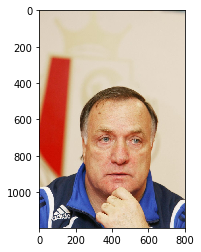

0.0 0


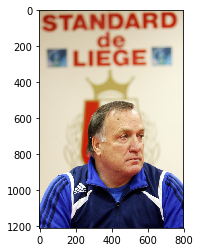

0.0 0


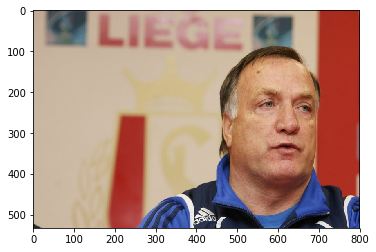

0.0 0


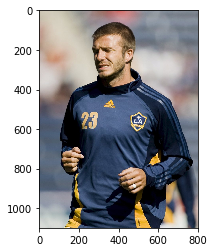

0.0 0


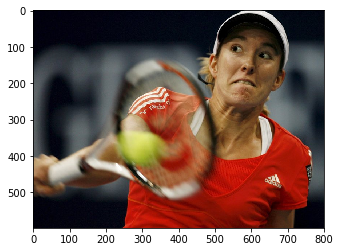

0.0 0


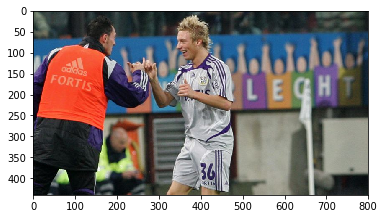

0.0 0


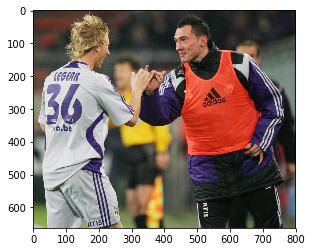

0.0 0


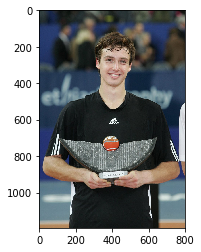

0.0 0


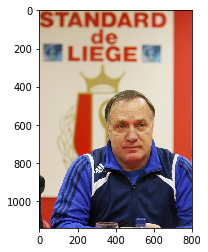

0.0 0


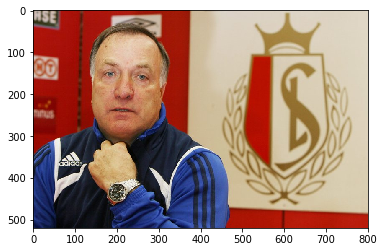

0.0 0


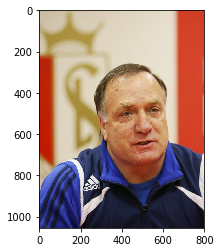

0.0 0


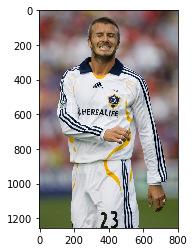

0.0 0


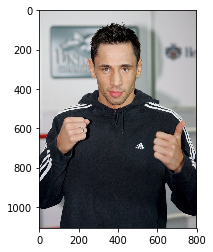

0.0 0


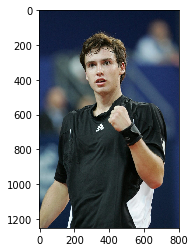

0.0 0


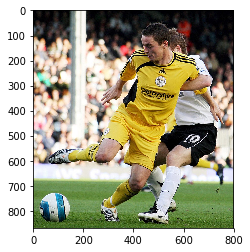

0.0 0


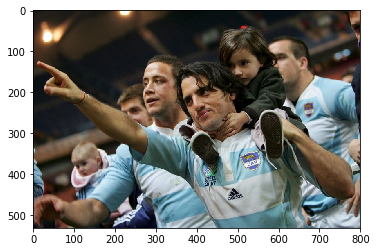

0.0 0


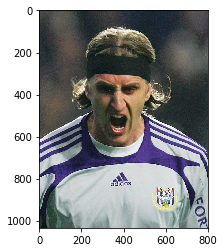

0.0 0


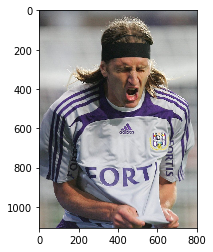

0.0 0


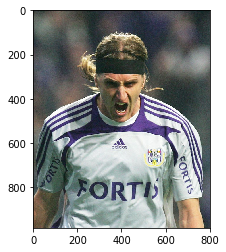

0.0 0


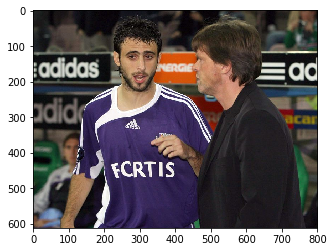

0.0 0


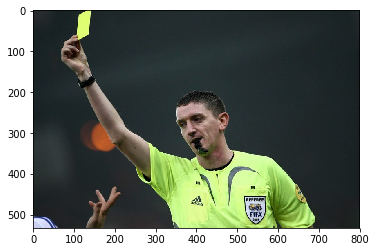

0.0 0


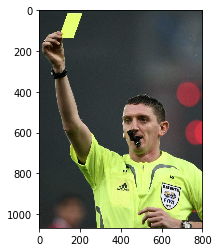

0.0 0


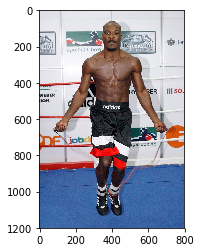

0.0 0


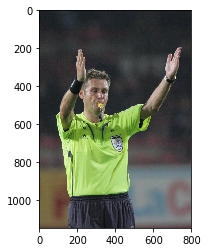

0.0 0


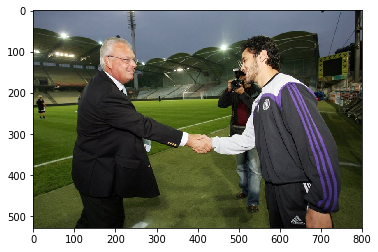

0.0 0


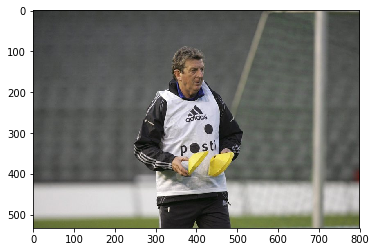

0.0 0


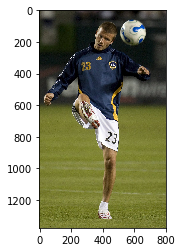

0.0 0


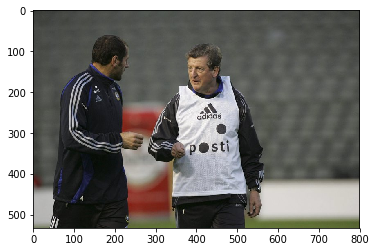

0.0 0


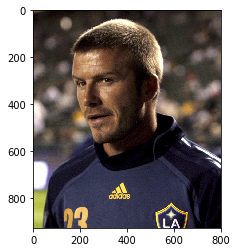

In [4]:
images = car_metadata["image_file"].unique()
true_positives = 0
total_positives = 0
false_positives = 0

for image in images:
    # Fetch corresponding annotations
    BL_Annotations = car_metadata[car_metadata["image_file"] == image]
    total_positives += BL_Annotations.shape[0]
    test_image = cv2.imread(os.path.join("data", "images", image))
    bounding_boxes, labels  = SIFTMatcher.matching_bounding_boxes(test_image)
    true_positives += min(BL_Annotations.shape[0], len(labels))
    false_positives += max(len(labels)-BL_Annotations.shape[0], 0)

    print(true_positives/total_positives, false_positives)

    annotated_image = kpm.draw_bounding_boxes(test_image, bounding_boxes)
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.show()